In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

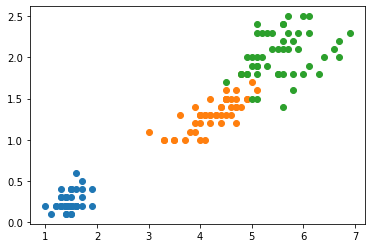

In [11]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
def plot_decision_boundary(model,axis):
    '''axis是x轴y轴对应的范围'''
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

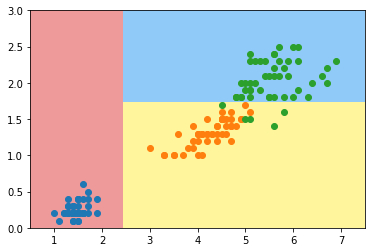

In [44]:
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

## 模拟使用信息熵进行划分

In [30]:
def split(X,y,d,value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [32]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X,y):
    
    best_entropy = float('inf')
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d]) / 2
                X_l,X_r,y_l,y_r = split(X,y,d,v)
                e = entropy(y_l)+entropy(y_r)
                if e < best_entropy:
                    best_entropy,best_d,best_v = e,d,v
    return best_entropy,best_d,best_v
            

In [35]:
best_entropy,best_d,best_v = try_split(X,y)

In [40]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)
print("best_entropy =",best_entropy)
print("best_d =",best_d)
print("best_v =",best_v)

best_entropy = 0.6931471805599453
best_d = 0
best_v = 2.45


In [37]:
entropy(y1_l)

0.0

In [38]:
entropy(y1_r)

0.6931471805599453

In [42]:
best_entropy2,best_d2,best_v2 = try_split(X1_r,y1_r)
print("best_entropy2 =",best_entropy2)
print("best_d2 =",best_d2)
print("best_v2 =",best_v2)

best_entropy2 = 0.4132278899361904
best_d2 = 1
best_v2 = 1.75


## 模拟使用基尼系数划分

In [49]:
def split(X,y,d,value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p **2
    return res

def try_split(X,y):
    
    best_g = float('inf')
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d] != X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d]) / 2
                X_l,X_r,y_l,y_r = split(X,y,d,v)
                g = gini(y_l)+gini(y_r)
                if g < best_g:
                    best_g,best_d,best_v = g,d,v
    return best_g,best_d,best_v

In [50]:
best_g,best_d,best_v = try_split(X,y)
print("best_g =",best_g)
print("best_d =",best_d)
print("best_v =",best_v)

best_g = 0.5
best_d = 0
best_v = 2.45


In [51]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [52]:
gini(y1_l)

0.0

## CART和决策树的超参数

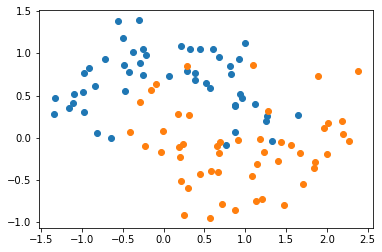

In [53]:
X,y = datasets.make_moons(noise=0.25,random_state=666)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [54]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

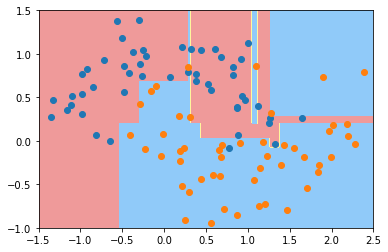

In [55]:
plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

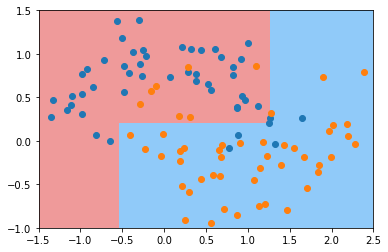

In [57]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X,y)

plot_decision_boundary(dt_clf2,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

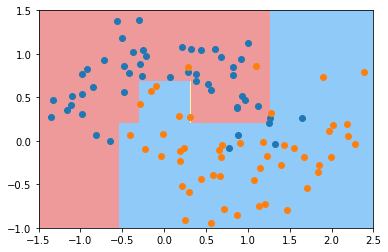

In [58]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X,y)

plot_decision_boundary(dt_clf3,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

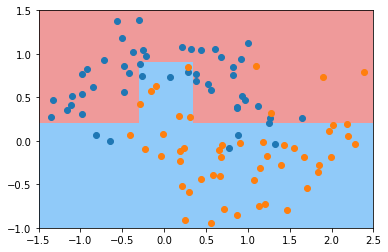

In [59]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X,y)

plot_decision_boundary(dt_clf4,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

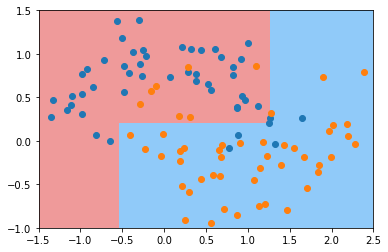

In [60]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X,y)

plot_decision_boundary(dt_clf5,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

## 决策树解决回归问题

In [62]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

## Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

dt_reg =  DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
dt_reg.score(X_test,y_test)

0.5992679329037127

In [66]:
dt_reg.score(X_train,y_train)

1.0